In [1]:
import os
import sys
sys.path.insert(0, '/Users/jennifercyc/Desktop/HSH/ML Project/fraud-detector/src')
from train import train_models, build_summary_table

import pandas as pd

In [2]:
#load cleaned datasets

df_inliers = pd.read_csv("../data/processed_inliers.csv")
df_outliers = pd.read_csv("../data/processed_outliers.csv")

In [3]:
reports, metrics_data = train_models(df_inliers, df_outliers)

In [4]:
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 120)

In [5]:
summary_df = build_summary_table(reports, metrics_data)

                       F1 (Fraud)  Recall (Fraud)  Precision (Fraud)  Accuracy  ROC AUC
Model 1: LR Inliers          0.59            0.51               0.70      0.83     0.84
Model 2: XGB Inliers         0.64            0.70               0.59      0.82     0.82
Model 3: LR Outliers         0.42            0.31               0.67      0.74     0.80
Model 4: XGB Outliers        0.77            0.77               0.77      0.86     0.94


## 🔬 Feature selection experiment (did not improve metrics, so skipped)

In [6]:
#from visualization import plot_xgb_importance, get_feature_names_from_column_transformer
#import joblib

#model2 = joblib.load("/Users/jennifercyc/Desktop/HSH/ML Project/fraud-detector/models/model2_xgb_inliers.pkl")
#preprocessor2 = joblib.load("/Users/jennifercyc/Desktop/HSH/ML Project/fraud-detector/models/preprocessor2_inliers.pkl")
#feature_names2 = get_feature_names_from_column_transformer(preprocessor2)
#plot_xgb_importance(model2, feature_names=feature_names2, max_features=40, title="Top Features (XGB Inliers)")

#model4 = joblib.load("/Users/jennifercyc/Desktop/HSH/ML Project/fraud-detector/models/model4_xgb_outliers.pkl")
#preprocessor4 = joblib.load("/Users/jennifercyc/Desktop/HSH/ML Project/fraud-detector/models/preprocessor2_inliers.pkl")
#feature_names4 = get_feature_names_from_column_transformer(preprocessor4)
#plot_xgb_importance(model4, feature_names=feature_names4, max_features=40, title="Top Features (XGB Outliers)")

In [7]:
#from feature_selection import get_important_features_from_xgb

#important_feats = get_important_features_from_xgb(model2, feature_names2, threshold=0.1)
#df_inliers = df_inliers[important_feats + ['fraud_reported']]

#important_feats = get_important_features_from_xgb(model4, feature_names4, threshold=0.1)
#df_outliers = df_outliers[important_feats + ['fraud_reported']]

#reports, metrics_data = train_models(df_inliers, df_outliers)
#summary_df = build_summary_table(reports, metrics_data)

## Model Intepretation (model 2 and model 4 - both XGBoost)

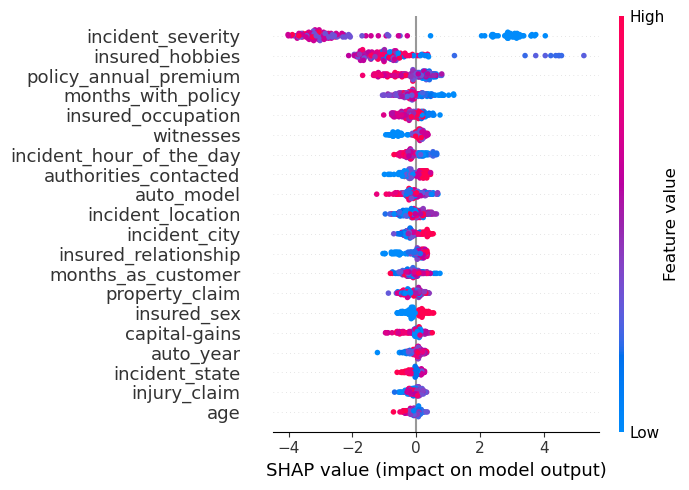

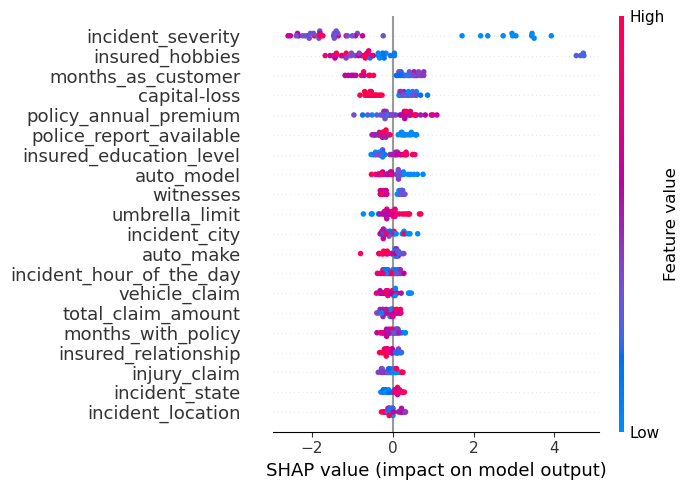

In [8]:
from visualization import plot_xgb_importance, get_feature_names_from_column_transformer, explain_model_with_shap
import joblib

model2 = joblib.load("/Users/jennifercyc/Desktop/HSH/ML Project/fraud-detector/models/model2_xgb_inliers.pkl")
X2_test = joblib.load("/Users/jennifercyc/Desktop/HSH/ML Project/fraud-detector/models/X2_test_inliers.pkl")
preprocessor2 = joblib.load("/Users/jennifercyc/Desktop/HSH/ML Project/fraud-detector/models/preprocessor2_inliers.pkl")
feature_names2 = get_feature_names_from_column_transformer(preprocessor2)
explain_model_with_shap(model2,X2_test,feature_names2)

model4 = joblib.load("/Users/jennifercyc/Desktop/HSH/ML Project/fraud-detector/models/model4_xgb_outliers.pkl")
X4_test = joblib.load("/Users/jennifercyc/Desktop/HSH/ML Project/fraud-detector/models/X4_test_outliers.pkl")
preprocessor4 = joblib.load("/Users/jennifercyc/Desktop/HSH/ML Project/fraud-detector/models/preprocessor4_outliers.pkl")
feature_names4 = get_feature_names_from_column_transformer(preprocessor4)
explain_model_with_shap(model4,X4_test,feature_names4)